# <center>Data Science And AI Project

### Import Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pickle

### Reading The Dataset

In [7]:
data = pd.read_csv("insurance_dataset.csv")
data.drop(columns=['sex'])

,age,bmi,children,smoker,region,charges
0,52,27.360,0,yes,northwest,24393.62240
1,30,44.220,2,no,southeast,4266.16580
2,19,27.265,2,no,northwest,22493.65964
3,20,26.840,1,yes,southeast,17085.26760
4,27,24.750,0,yes,southeast,16577.77950
...,...,...,...,...,...,...
1132,18,31.350,4,no,northeast,4561.18850
1133,39,23.870,5,no,southeast,8582.30230
1134,58,25.175,0,no,northeast,11931.12525
1135,37,47.600,2,yes,southwest,46113.51100


# <center>Data Exploration

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1137 non-null   int64  
 1   sex       1137 non-null   object 
 2   bmi       1137 non-null   float64
 3   children  1137 non-null   int64  
 4   smoker    1137 non-null   object 
 5   region    1080 non-null   object 
 6   charges   1137 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 62.3+ KB
None

Summary Statistics:
               age          bmi     children       charges
count  1137.000000  1137.000000  1137.000000   1137.000000
mean     35.681618    30.550752     0.985928  13285.245207
std      21.581298     6.124758     1.305384  12068.858512
min     -63.000000    15.960000    -5.000000   1121.873900
25%      25.000000    26.180000     0.000000   4779.602300
50%      38.000000    30.210000     1.000000   9504.310300
75%      51.000000    3

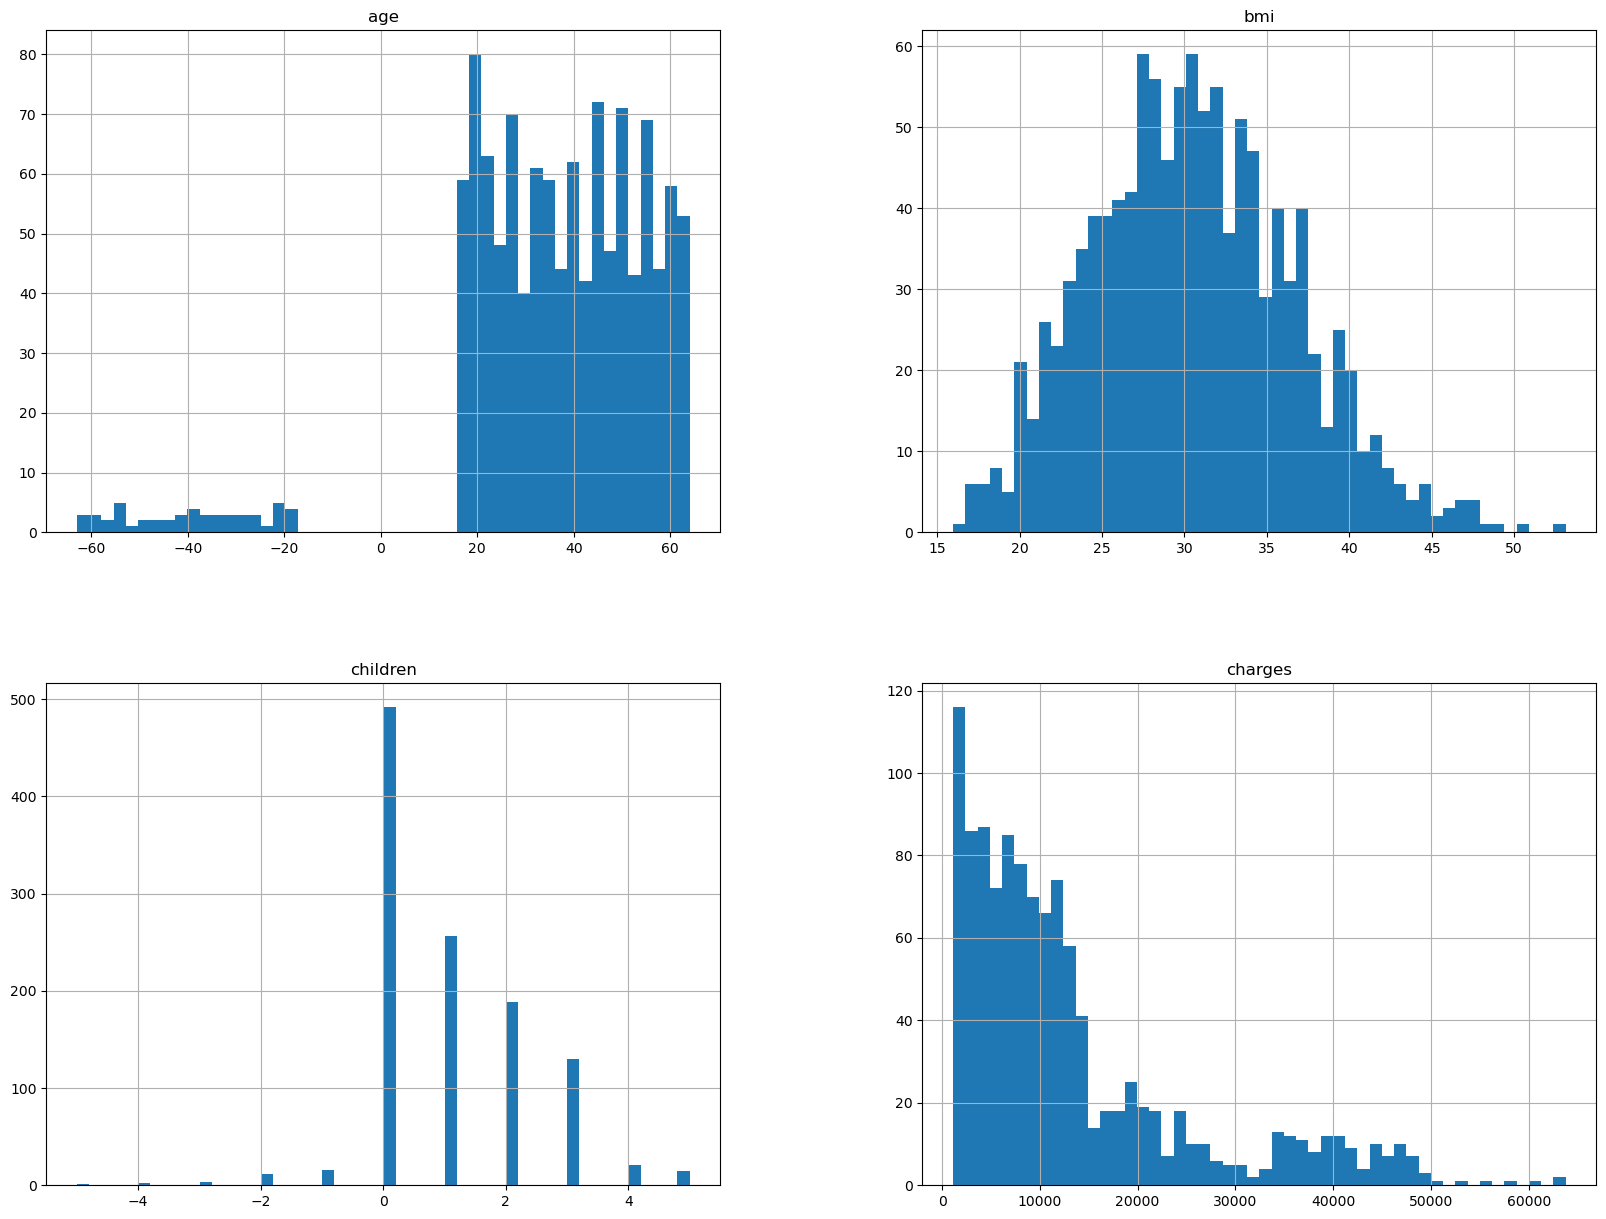

In [9]:
print("Dataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nLength Of Data:")
print(len(data))
print("\nGraphed Data:")
data.hist(bins=50, figsize=(20,15))
plt.show()

### Check For Missing Values And Negative Values

In [11]:
missing_values = data.isnull().sum()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
negative_values = {}
for col in numerical_cols:    
    negative_count = (data[col] < 0).sum()
    if negative_count > 0:
        negative_values[col] = negative_count       
print("\nMissing Values per Column:")
print(missing_values)
print("\nNegative Values per Numerical Column:")
print(negative_values)


Missing Values per Column:
age          0
sex          0
bmi          0
children     0
smoker       0
region      57
charges      0
dtype: int64

Negative Values per Numerical Column:
{'age': 52, 'children': 34}


### Handling Missing Values And Negative Values

In [13]:
for i in missing_values:
    if data['region'].isnull().sum() > 0:
        mode_region = data['region'].mode()[0]
        data['region'] = data['region'].fillna(mode_region)
else:
    print("No more missing values")    
for col in numerical_cols:
    if (data[col] < 0).any():
        data[col] = data[col].abs()
else:
    print("\nNo more negative values")  

No more missing values

No more negative values


# <center>Data Visualization

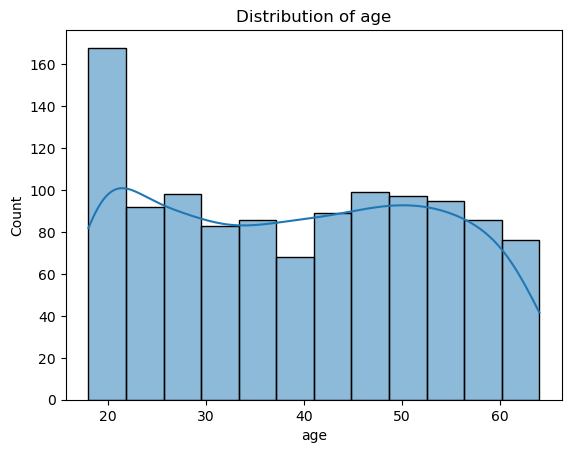

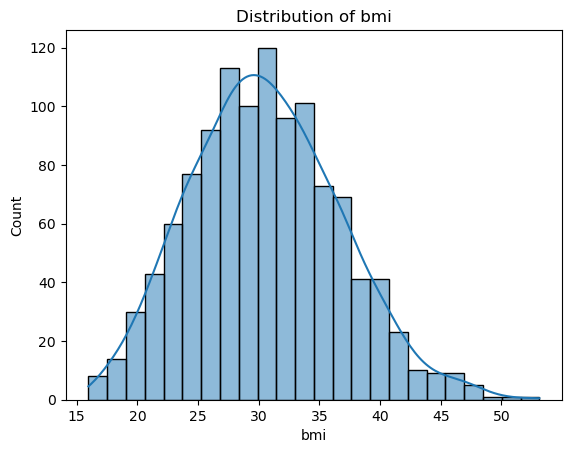

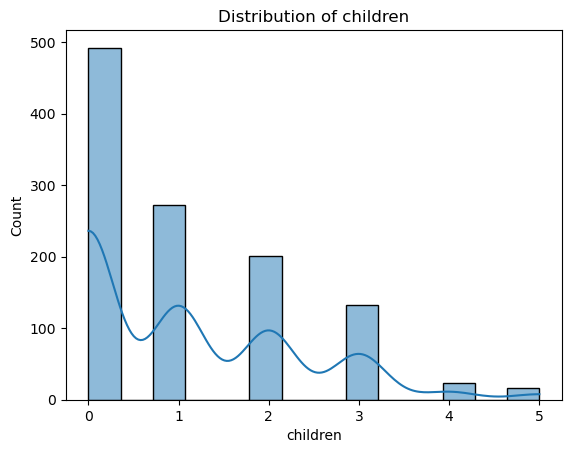

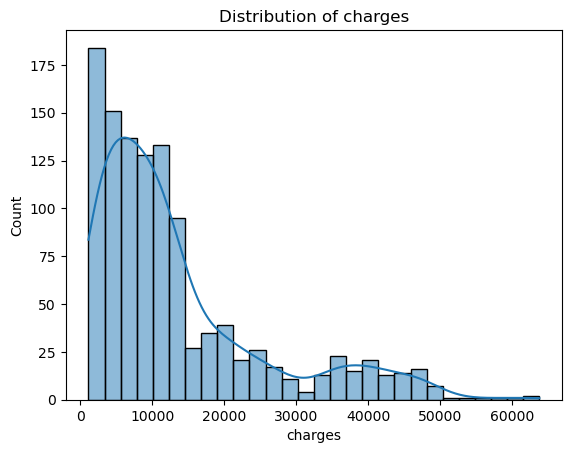

In [22]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Correlation Heatmap

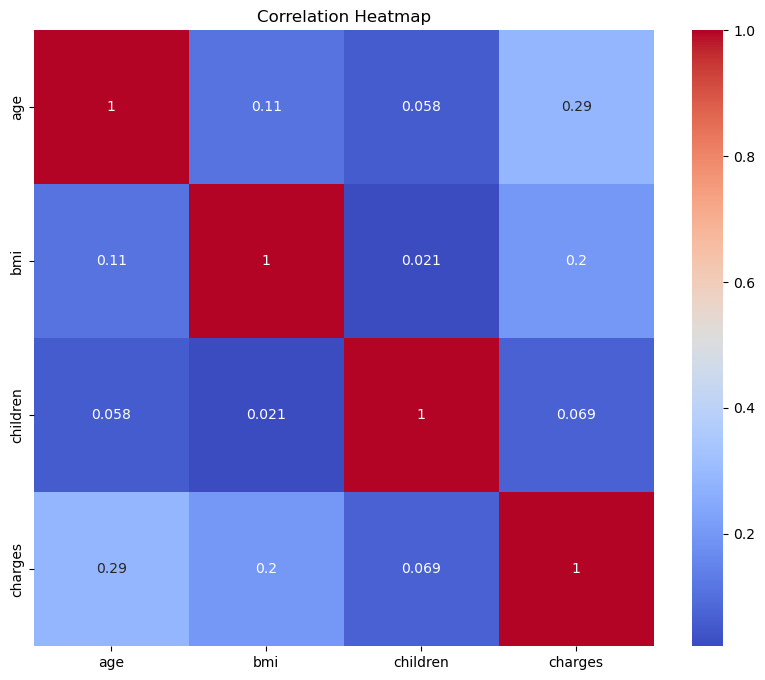

In [29]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# <center>Data Preprocessing

In [32]:
X = data.drop(columns=['charges'])
y = data['charges']

### Identify Categorical And Numerical Features

In [237]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

### Preprocessing For Numerical And Categorical Features

In [240]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Split Data Into Training And Test Sets

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Preprocessing

In [246]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

### Fit And Save Preprocessor

In [249]:
preprocessor.fit(X_train)
with open('ppreprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# <center>Neural Network Design

In [255]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_preprocessed.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)

])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
print(model.summary())

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

None


### Training The Model

In [258]:
history = model.fit(X_train_preprocessed, y_train, epochs=500, validation_split=0.2, batch_size=32)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 357339712.0000 - mae: 13929.1318 - val_loss: 340380672.0000 - val_mae: 13789.3525
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 338412544.0000 - mae: 13672.7158 - val_loss: 339935968.0000 - val_mae: 13773.4092
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307771712.0000 - mae: 13115.7402 - val_loss: 338164224.0000 - val_mae: 13710.3047
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 330678688.0000 - mae: 13406.2617 - val_loss: 332666432.0000 - val_mae: 13514.2090
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299006560.0000 - mae: 12630.7422 - val_loss: 319053856.0000 - val_mae: 13019.9561
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 306598752.0000 - mae: 12538.8203 - val_loss: 291823584.0000 - val_mae: 11988.4863
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301053184.0000 - mae: 11839.2773 - val_loss: 248866768.0000 - val_mae: 10346.8428
Epoch 8/500
2

# <center>Performance Evaluation

In [260]:
y_pred = model.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 18090357.737104192
Mean Absolute Error: 2468.4023547553456


### Visualizing Training Performance

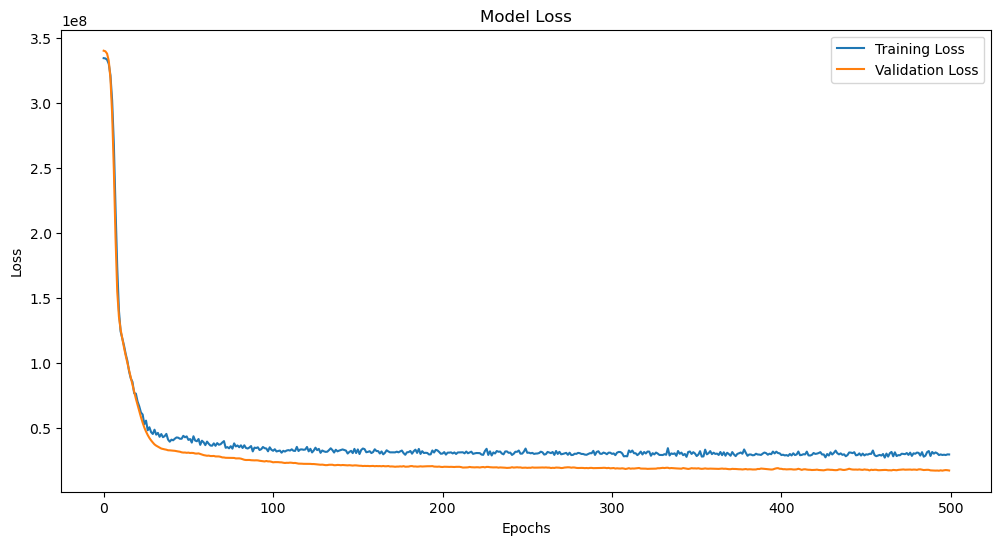

In [263]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

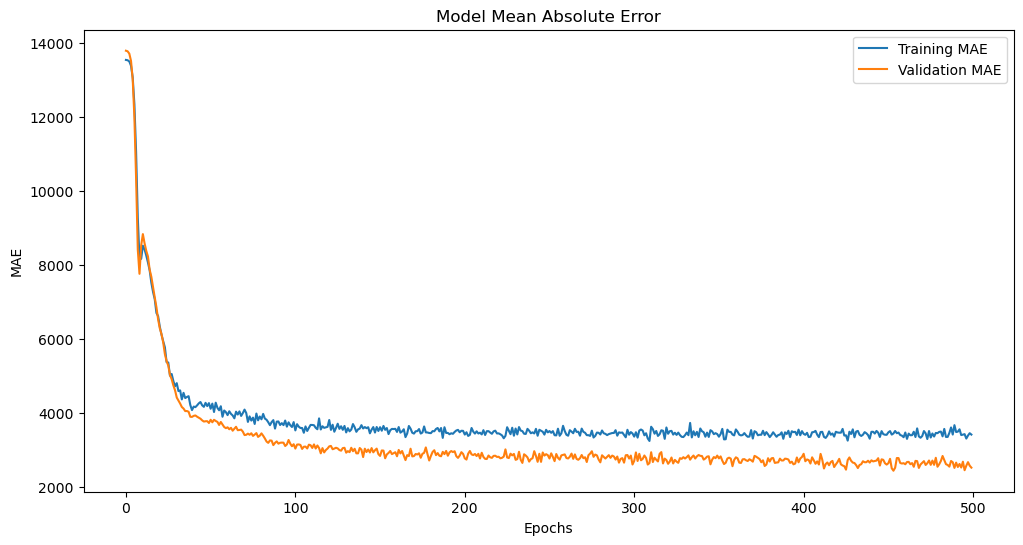

In [265]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [267]:
y_pred = model.predict(X_test_preprocessed)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error: 2468.4023547553456
Mean Squared Error: 18090357.737104192


# <center>Saving The Model

In [270]:
model.save('trained_project11_model.keras')
print("Model saved and ready for real-data testing")

Model saved and ready for real-data testing
